In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('../input/airlines-customer-satisfaction/Invistico_Airline.csv')

In [3]:
df.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [4]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
#drop rows with missing values
df.dropna(inplace=True)

In [6]:
#new column total delay
df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [7]:
#drop 'Departure Delay in Minutes',and 'Arrival Delay in Minutes'
df.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)

### Convert Categorial features to numeric

In [8]:
#satisfied and dissatisfied in number 
satisfaction_map = {"satisfied": 1,"dissatisfied": 0 }
df['satisfaction']  = df['satisfaction'].map(satisfaction_map)

#Male and Female in number 
Gender_map = {"Male": 1,"Female": 2 }
df['Gender']  = df['Gender'].map(Gender_map)

#Loyal and disloyal in number 
Customer_Type_map = {"Loyal Customer": 1,"disloyal Customer": 0 }
df['Customer Type']  = df['Customer Type'].map(Customer_Type_map)

#Business travel and Business travel in number 
Type_of_Travel_map = {"Business travel": 1,"Personal Travel": 2 }
df['Type of Travel']  = df['Type of Travel'].map(Type_of_Travel_map)

#Business and Eco and Eco plus in number 
Class_map = {"Business": 1,"Eco": 3, "Eco Plus": 2 }
df['Class']  = df['Class'].map(Class_map)

### Check for and Remove Outliers

In [9]:
df.describe()

satisfaction         Gender  Customer Type            Age  \
count  129487.000000  129487.000000  129487.000000  129487.000000   
mean        0.547406       1.507410       0.816862      39.428761   
std         0.497749       0.499947       0.386781      15.117597   
min         0.000000       1.000000       0.000000       7.000000   
25%         0.000000       1.000000       1.000000      27.000000   
50%         1.000000       2.000000       1.000000      40.000000   
75%         1.000000       2.000000       1.000000      51.000000   
max         1.000000       2.000000       1.000000      85.000000   

       Type of Travel          Class  Flight Distance   Seat comfort  \
count   129487.000000  129487.000000    129487.000000  129487.000000   
mean         1.309236       1.970090      1981.008974       2.838586   
std          0.462180       0.962638      1026.884131       1.392873   
min          1.000000       1.000000        50.000000       0.000000   
25%          1.000000       1.000000      1359.000000       2.000000   
50%          1.000000       2.000000      1924.000000       3.000000   
75%          2.000000       3.000000      2543.000000       4.000000   
max          2.000000       3.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  ...  \
count                      129487.000000   129487.000000  ...   
mean                            2.990277        2.852024  ...   
std                             1.527183        1.443587  ...   
min                             0.000000        0.000000  ...   
25%                             2.000000        2.000000  ...   
50%                             3.000000        3.000000  ...   
75%                             4.000000        4.000000  ...   
max                             5.000000        5.000000  ...   

       Inflight entertainment  Online support  Ease of Online booking  \
count           129487.000000   129487.000000           129487.000000   
mean                 3.383745        3.519967                3.472171   
std                  1.345959        1.306326                1.305573   
min                  0.000000        0.000000                0.000000   
25%                  2.000000        3.000000                2.000000   
50%                  4.000000        4.000000                4.000000   
75%                  4.000000        5.000000                5.000000   
max                  5.000000        5.000000                5.000000   

       On-board service  Leg room service  Baggage handling  Checkin service  \
count     129487.000000     129487.000000     129487.000000    129487.000000   
mean           3.465143          3.486118          3.695460         3.340729   
std            1.270755          1.292079          1.156487         1.260561   
min            0.000000          0.000000          1.000000         0.000000   
25%            3.000000          2.000000          3.000000         3.000000   
50%            4.000000          4.000000          4.000000         3.000000   
75%            4.000000          5.000000          5.000000         4.000000   
max            5.000000          5.000000          5.000000         5.000000   

         Cleanliness  Online boarding    total_delay  
count  129487.000000    129487.000000  129487.000000  
mean        3.705886         3.352545      29.734514  
std         1.151683         1.298624      75.732722  
min         0.000000         0.000000       0.000000  
25%         3.000000         2.000000       0.000000  
50%         4.000000         4.000000       2.000000  
75%         5.000000         4.000000      24.000000  
max         5.000000         5.000000    3176.000000  

[8 rows x 22 columns]

In [10]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'total_delay'],
      dtype='object')

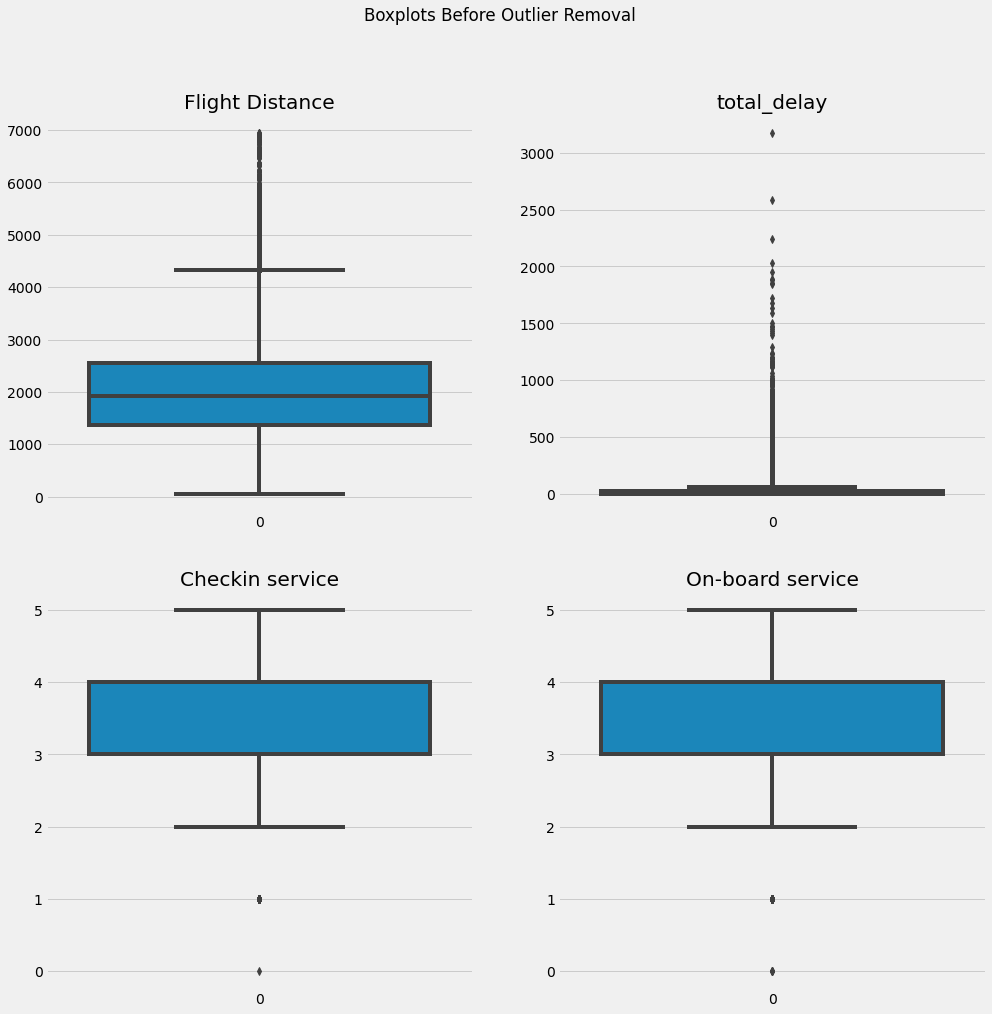

In [11]:
df_outliers = df
c = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

plt.figure(figsize=(15, 15))

for i, column in enumerate(c):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.suptitle("Boxplots Before Outlier Removal")
plt.show()

In [12]:
cols = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

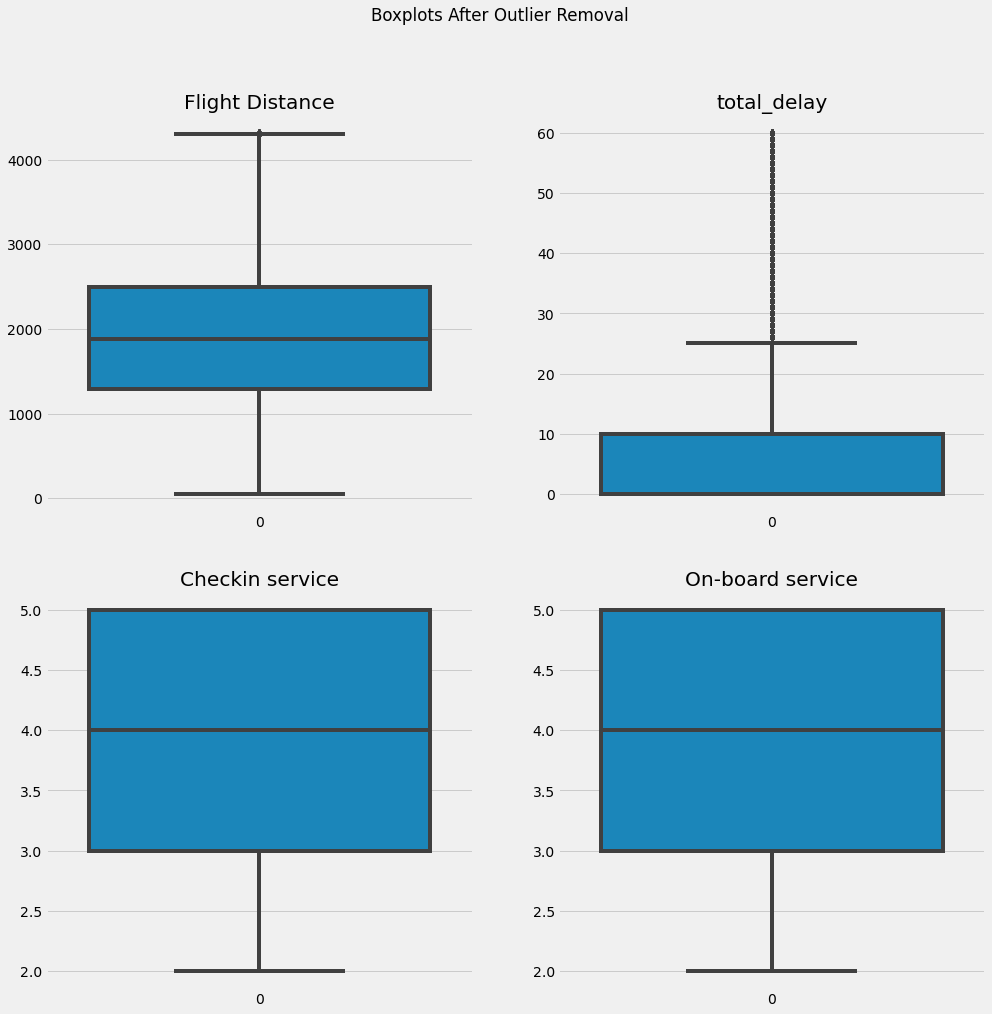

In [13]:
df_outliers = df
c = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

plt.figure(figsize=(15, 15))

for i, column in enumerate(c):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.suptitle("Boxplots After Outlier Removal")
plt.show()

### Split Data

In [14]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 111)

### Modelling

In [16]:
#from numpy.random import seed
#seed(1)
import tensorflow as tf
#tf.random.set_seed(221)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
keras_model = Sequential()
keras_model.add(Dense(100, activation='relu', input_dim=21))
keras_model.add(BatchNormalization())
keras_model.add(Dense(40, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.4861 - accuracy: 0.7675
Epoch 2/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3753 - accuracy: 0.8379
Epoch 3/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3541 - accuracy: 0.8466
Epoch 4/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3354 - accuracy: 0.8579
Epoch 5/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3209 - accuracy: 0.8645
Epoch 6/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3069 - accuracy: 0.8688
Epoch 7/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.2868 - accuracy: 0.8800
Epoch 8/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.8890
Epoch 9/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.2612 - accuracy: 0.8899
Epoch 10/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.261

In [17]:
eval_results = keras_model.evaluate(X_test,y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.2870 88.60%


In [18]:
prediction_keras = np.around(keras_model.predict(X_test))

# Test score
score_keras = keras_model.evaluate(X_test, y_test)
print('test accuracy:')
print(score_keras)
print('train accuracy:')
print(keras_model.evaluate(X_train, y_train))

print(classification_report(y_test,prediction_keras))

830/830 [==============================] - 1s 836us/step - loss: 0.2870 - accuracy: 0.8860
test accuracy:
[0.28701019287109375, 0.8860135078430176]
train accuracy:
1936/1936 [==============================] - 2s 838us/step - loss: 0.2901 - accuracy: 0.8820
[0.29012951254844666, 0.881970226764679]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     10134
           1       0.87      0.95      0.91     16413

    accuracy                           0.89     26547
   macro avg       0.89      0.86      0.88     26547
weighted avg       0.89      0.89      0.88     26547



In [19]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


##### Define prediction probability function

In [20]:
def prob(df):
    print(df.shape)
    y_pred=keras_model.predict(df).reshape(-1, 1)
    #y_pred =(y_pred>0.5)
    print(np.array(list(zip(1-y_pred.reshape(df.shape[0]),y_pred.reshape(df.shape[0])))))
    return np.hstack((1-y_pred,y_pred))

##### Indicate Categorical Features

In [21]:
feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'total_delay']

In [22]:
categorical_names = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding' ]
categorical_features = [0, 1, 3, 4,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

##### Import necessary Libraries

In [23]:
import lime
import lime.lime_tabular

##### Create the explainer

In [24]:
explainer = lime.lime_tabular.LimeTabularExplainer(X[list(X.columns)].astype(int).values,  
mode='classification',training_labels=df['satisfaction'],feature_names=list(X.columns), class_names=['Dissatisfied', 'Satisfied'], categorical_features=categorical_features, categorical_names=categorical_names)

##### Explain an instance

In [25]:
i = 19
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

(5000, 21)
[[0.20329213 0.79670787]
 [0.02110302 0.978897  ]
 [0.45381004 0.54618996]
 ...
 [0.4526109  0.5473891 ]
 [0.9894693  0.01053071]
 [0.00356901 0.996431  ]]


In [26]:
exp.show_in_notebook(show_table=True, show_all=False)

##### Note that the row we are explaining is displayed on the right side, in a table format with 2 columns: Feature and Values. Since we had the show_all parameter set to false, only the features used in the explanation (in this case, the 10 most important features) are displayed.

##### The value column displays the original value for each feature.


##### Now note that the explanations are based not only on features, but on feature-value pairs. For example, we are saying that Customer Type=1 is indicative of a satisfied Customer (Recall that in our EDA, coyal Customers(customer type 1) were mostly satisfied against customer type 2(disloyal customers)). 

##### The way to interpret this is: if type of travel was not 2 (that is, personal travel), on average, this prediction would be 0.35 more 'satisfied'.


##### Attributes in orange support satisfied customers and those in blue support Dissatisfied Customers. Flight Distance > 2497 supports Dissatisfied Customers, that is, it has a negative impact towards predicting the instance as 'satisfied'. 

##### Float point numbers on the horizontal bars represent the relative importance of these features.

#### Generate a bar chart of feature contribution for this instance

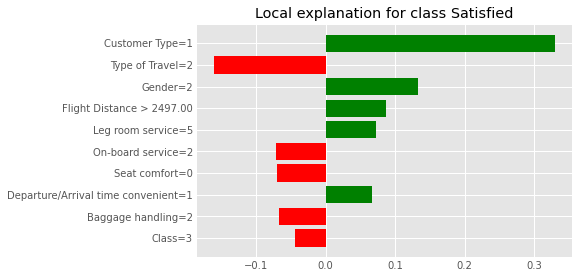

In [27]:
import matplotlib.pyplot as plt

with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [28]:
i = 13
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[0.56295437 0.43704563]
 [0.40118426 0.59881574]
 [0.02158868 0.9784113 ]
 ...
 [0.7015386  0.29846138]
 [0.9757929  0.02420709]
 [0.4249556  0.5750444 ]]


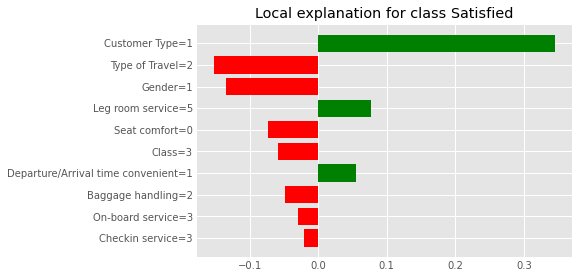

In [29]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [30]:
i = 16
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[0.22816896 0.77183104]
 [0.01035643 0.9896436 ]
 [0.05512774 0.94487226]
 ...
 [0.02982289 0.9701771 ]
 [0.27882594 0.72117406]
 [0.9985173  0.00148275]]


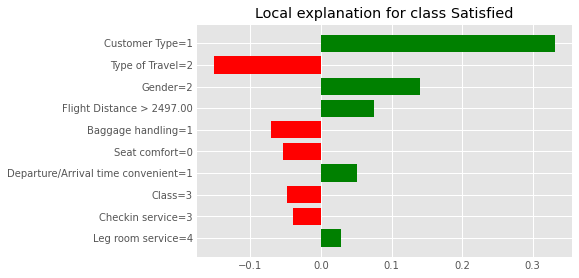

In [31]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [32]:
i = 10001
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[0.29850608 0.7014939 ]
 [0.08664131 0.9133587 ]
 [0.02397358 0.9760264 ]
 ...
 [0.02915454 0.97084546]
 [0.00762773 0.9923723 ]
 [0.9924439  0.00755608]]


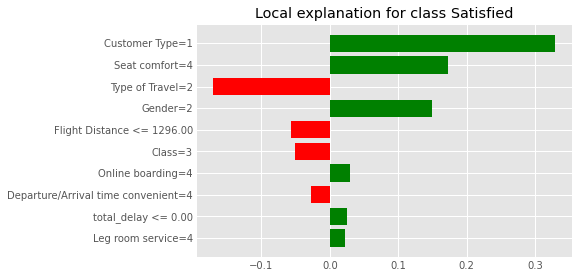

In [33]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [34]:
i = 567
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True, show_all=False)

(5000, 21)
[[0.7683346  0.23166537]
 [0.34505653 0.65494347]
 [0.14057982 0.8594202 ]
 ...
 [0.00461209 0.9953879 ]
 [0.09229326 0.90770674]
 [0.55541444 0.44458553]]


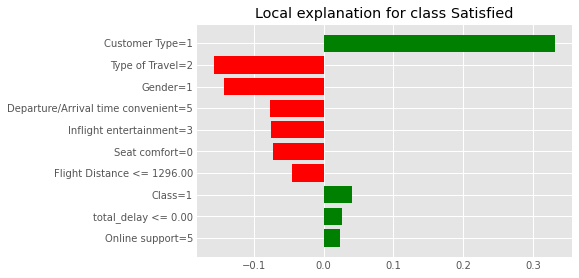

In [35]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

### From the above instances, we see that the most important features are: Customer Type, Type of Travel, Gender, seat comfort, and Departure/Arrival Time Convenient 